In [ ]:
# MOVIE RATING PREDICTION PROJECT

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1') # or 'ISO-8859-1'

In [ ]:
# Step 3: View basic info about the dataset
print(df.head())
print(df.info())
print(df.describe())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
# Step 4: Handle missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-11-3c5121a6e205>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Step 5: Encode categorical features like Genre, Director, Actors
label_encoders = {}
# Get a list of all object (string) columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exclude the 'Rating' column if it's an object type
if 'Rating' in object_cols:
    object_cols.remove('Rating')

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [ ]:
# Step 6: Define features (X) and target (y)
X = df.drop(columns=['Rating'])  # Replace 'Rating' with your actual rating column name
y = df['Rating']

# Convert 'y' to numeric, coercing non-numeric values to NaN
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values in 'y' from both X and y
X = X[y.notna()]
y = y[y.notna()]

In [ ]:
# Step 7: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.64
R² Score: 0.14


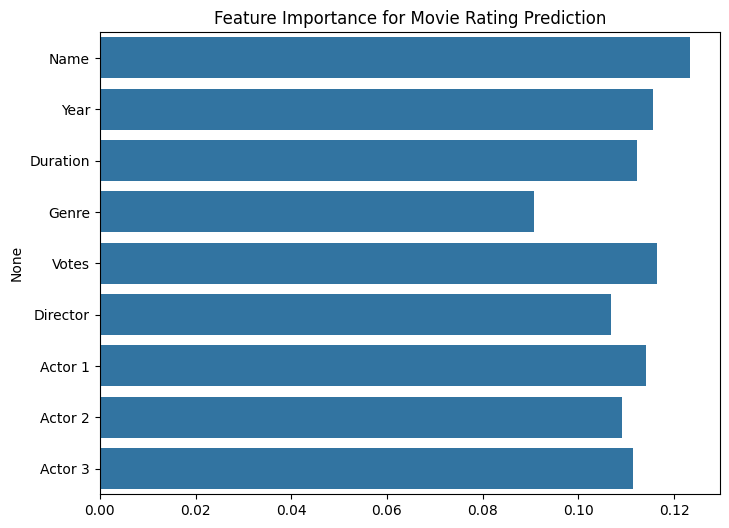

In [ ]:
# Optional: Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Movie Rating Prediction")
plt.show()